In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv


## 📊 Weight Distribution vs Normal Distribution

This plot visualizes the distribution of weight data from the dataset and compares it to a theoretical normal distribution curve.

- The **sky blue bars** represent the actual weight data (histogram).
- The **blue curve** is the Probability Density Function (PDF) of a normal distribution using:
  - Mean = `df['Weight'].mean()`
  - Standard Deviation = `df['Weight'].std()`

This helps us check if the weight values follow a normal distribution or if the data is skewed or contains outliers.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

df=pd.read_csv("/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


**Step 1** : Calculate mean and Standard Deviation of weight

In [3]:
mean= df['Weight'].mean()
std= df['Weight'].std()

**Step 2**: Create an array of values across the weight range

In [4]:
x=np.linspace(df['Weight'].min(),df['Weight'].max(),150)

**Step 3** : Generate normal distribution curve (PDF)

In [5]:
pdf=norm.pdf(x,mean,std)

**Step 4** : Plot histogram of real data and normal curve

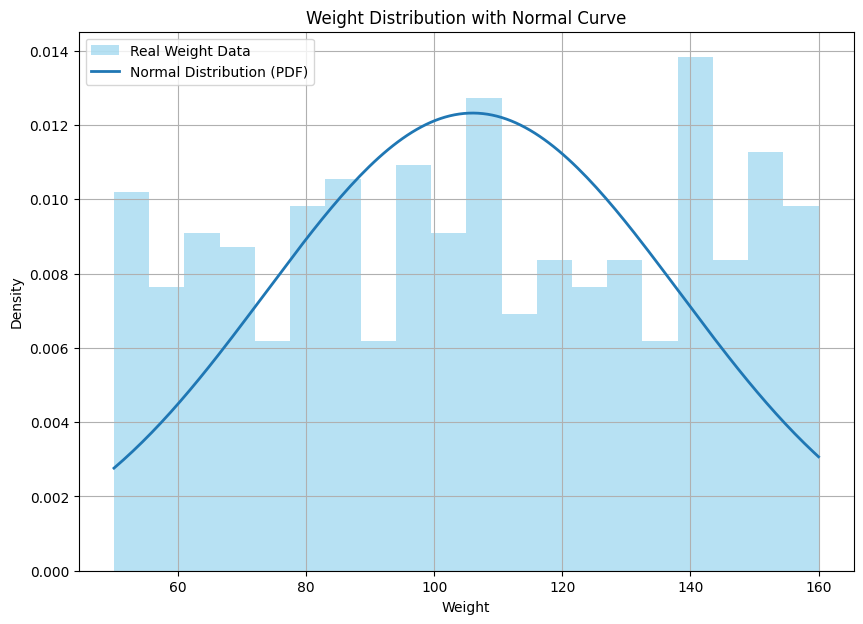

In [6]:
plt.figure(figsize=(10, 7))
plt.hist(df['Weight'], bins=20, density=True, alpha=0.6, color='skyblue', label='Real Weight Data')
plt.plot(x, pdf, label='Normal Distribution (PDF)', linewidth=2)
plt.title("Weight Distribution with Normal Curve")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()